In [191]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from tqdm import tqdm, trange

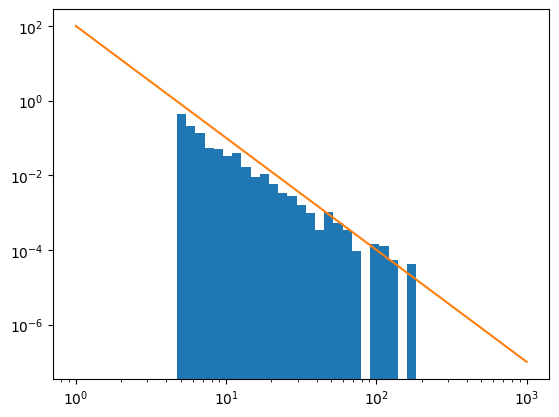

In [8]:
G1 = nx.powerlaw_cluster_graph(1000, 5, .3)
degrees = [d for _, d in G1.degree]
_, bins, _ = plt.hist(degrees, bins=np.logspace(0, 3), density=True, log=True)
plt.plot(bins, 100 / bins**3)
plt.xscale('log')
plt.yscale('log')

In [9]:
np.mean(degrees), min(degrees)

(9.914, 5)

In [124]:
def normalize_angle(a):
    while (a < 0).any() or (a > 2 * np.pi).any():
        a[a < 0] += 2 * np.pi
        a[a > 2 * np.pi] -= 2 * np.pi
    return a

In [176]:
def run(alpha, lambda_vals):
    G1 = nx.powerlaw_cluster_graph(1000, 5, .3)
    G2 = nx.erdos_renyi_graph(1000, 10 / (1000 - 1))
    A1 = nx.adjacency_matrix(G1).A
    A2 = nx.adjacency_matrix(G2).A

    N = 1000
    dt = 1e-2

    x = np.random.uniform(low=0., high=2 * np.pi, size=(N, 1))
    y = np.ones((N, 1), dtype=float) / N

    r_metrics = []

    for lambda_ in tqdm(np.hstack((lambda_vals[:-1], lambda_vals[::-1]))):
        r_prev = 0.
        for _ in trange(700):
            w = N * y
            
            x = normalize_angle(x)
            z = A1 @ np.exp(1j * x)
            r, psi = np.abs(z), np.angle(z)
            psi = normalize_angle(psi)
            chi = r * np.cos(psi - x)

            # To avoid negative powers
            chi += np.abs(chi.min())

            x += dt * (w + lambda_ * (A1 * np.sin(x.T - x)).sum(axis=1).reshape(N, 1))
            
            Pi = A2.T * chi**alpha / (A2.T @ chi**alpha).reshape((1, N))
            y = Pi @ y

        r_metric = np.abs(np.exp(1j * x).sum() / N)
        r_metrics.append(r_metric)
        np.save('r_metrics', r_metrics)
    return r_metrics

In [177]:
lambda_vals = np.linspace(0., .5, num=10)
r1 = run(.4, lambda_vals)

C:\Users\kuzne\AppData\Local\Temp\ipykernel_7804\1993594906.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).A
C:\Users\kuzne\AppData\Local\Temp\ipykernel_7804\1993594906.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A2 = nx.adjacency_matrix(G2).A
100%|██████████| 19/19 [06:24<00:00, 20.24s/it]


In [178]:
lambda_vals = np.linspace(0., .5, num=10)
r2 = run(1., lambda_vals)

C:\Users\kuzne\AppData\Local\Temp\ipykernel_7804\1993594906.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).A
C:\Users\kuzne\AppData\Local\Temp\ipykernel_7804\1993594906.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A2 = nx.adjacency_matrix(G2).A
100%|██████████| 19/19 [06:20<00:00, 20.05s/it]


In [179]:
lambda_vals = np.linspace(0., .5, num=10)
r3 = run(1.6, lambda_vals)

C:\Users\kuzne\AppData\Local\Temp\ipykernel_7804\1993594906.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).A
C:\Users\kuzne\AppData\Local\Temp\ipykernel_7804\1993594906.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A2 = nx.adjacency_matrix(G2).A
100%|██████████| 19/19 [06:41<00:00, 21.12s/it]


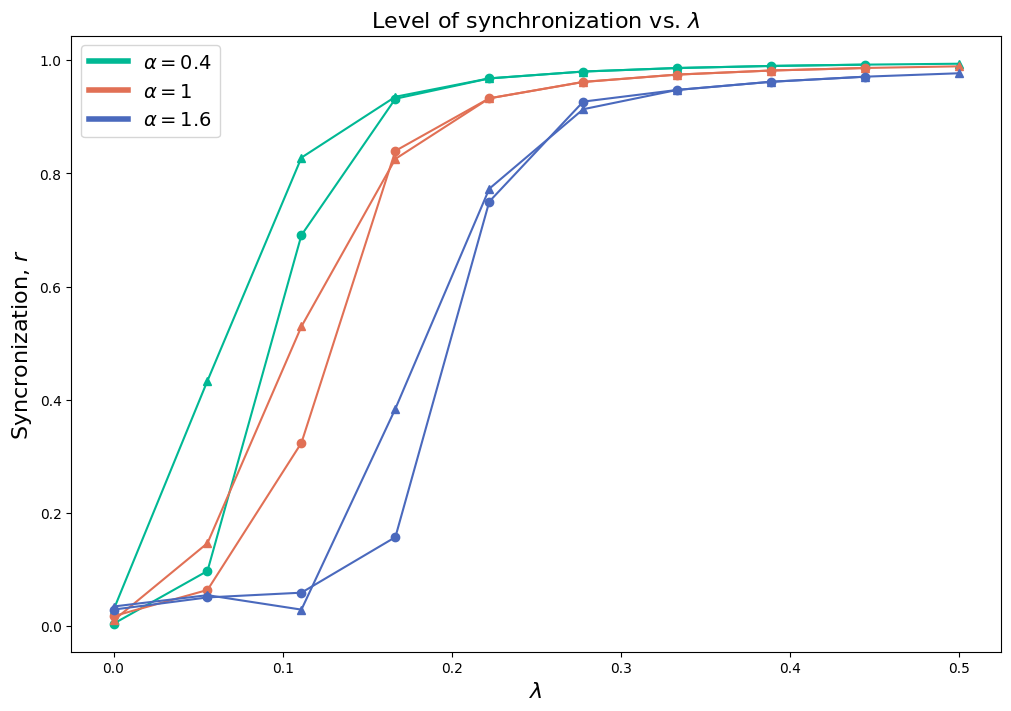

In [203]:
plt.subplots(figsize=(12, 8))

colors = ['#00b894', '#e17055', '#4a69bd']

plt.plot(lambda_vals[:-1], r1[:9], 'o-', color=colors[0])
plt.plot(lambda_vals[::-1], r1[9:], '^-', color=colors[0])

plt.plot(lambda_vals[:-1], r2[:9], 'o-', color=colors[1])
plt.plot(lambda_vals[::-1], r2[9:], '^-', color=colors[1])

plt.plot(lambda_vals[:-1], r3[:9], 'o-', color=colors[2])
plt.plot(lambda_vals[::-1], r3[9:], '^-', color=colors[2])

custom_lines = [
    Line2D([0], [0], color=colors[0], lw=4),
    Line2D([0], [0], color=colors[1], lw=4),
    Line2D([0], [0], color=colors[2], lw=4),
]

plt.legend(custom_lines, [
    r'$\alpha = 0.4$',
    r'$\alpha = 1$',
    r'$\alpha = 1.6$',
], prop={'size': 14})

plt.xlabel('$\lambda$', fontdict={'size': 16})
plt.ylabel('Syncronization, $r$', fontdict={'size': 16})
plt.title('Level of synchronization vs. $\lambda$', fontdict={'size': 16})

plt.savefig('histeresis')